Примите участие в одном или двух соревнованиях и пришлите

свой псевдоним на Kaggle и ссылку на github с решением соревнования

по регрессии (https://www.kaggle.com/c/tutors-expected-math-exam-results)


В скрипте можно использовать только эти импорты: import numpy as np import pandas as pd from sklearn.model_selection import train_test_split import matplotlib.pyplot as plt import seaborn as sns

https://www.kaggle.com/c/tutors-expected-math-exam-results

Tutors - expected math exam results
Predict average math exam results for students of the tutors

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

Метрика для оценки – Коэффициент детерминации:

𝑅2=1−𝜎2/𝜎2𝑦

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import random
import warnings
warnings.simplefilter('ignore')

#### Загрузка данных

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [276]:
df_train.describe(include='all').transpose().apply(round)

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,5000.0,2887.0,0.0,2500.0,5000.0,7499.0,9999.0
age,10000.0,46.0,8.0,23.0,40.0,46.0,51.0,68.0
years_of_experience,10000.0,2.0,2.0,0.0,0.0,2.0,3.0,10.0
lesson_price,10000.0,1699.0,525.0,200.0,1300.0,1500.0,2150.0,3950.0
qualification,10000.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
physics,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
chemistry,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
biology,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
english,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
geography,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [277]:
df_test.describe(include='all').transpose().apply(round)

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,15000.0,2887.0,10000.0,12500.0,15000.0,17499.0,19999.0
age,10000.0,46.0,8.0,23.0,41.0,46.0,51.0,68.0
years_of_experience,10000.0,2.0,2.0,0.0,0.0,2.0,3.0,10.0
lesson_price,10000.0,1697.0,524.0,200.0,1300.0,1500.0,2150.0,4050.0
qualification,10000.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
physics,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
chemistry,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
biology,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
english,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
geography,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Данные без пропусков. Нет отрицательных значений и больших выбросов

In [132]:
# Определим целевую переменную и признаки
TARGET = 'mean_exam_points'
FEATS = df_train.columns.drop(TARGET).drop('Id')

#### Визуализация данных

Text(0.5, 1.0, 'Mean exam points')

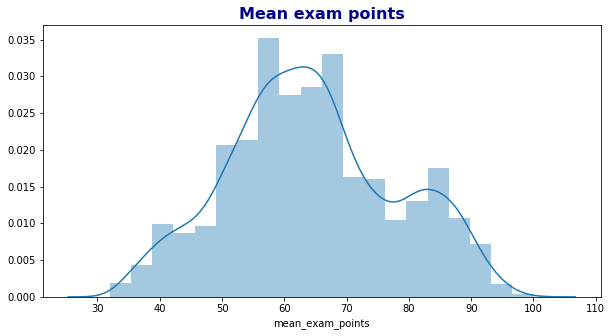

In [264]:
title_dict = {'fontsize': 16, 'fontweight': 'bold', 'color': 'darkblue'}
label_dict = {'fontsize': '14'}
plt.figure(figsize=(10, 5))
sns.distplot(df_train[TARGET], bins=20)
plt.title('Mean exam points', fontdict=title_dict)

#### Целевая переменная: Средний экзаминационный балл имеет нормальное распределение

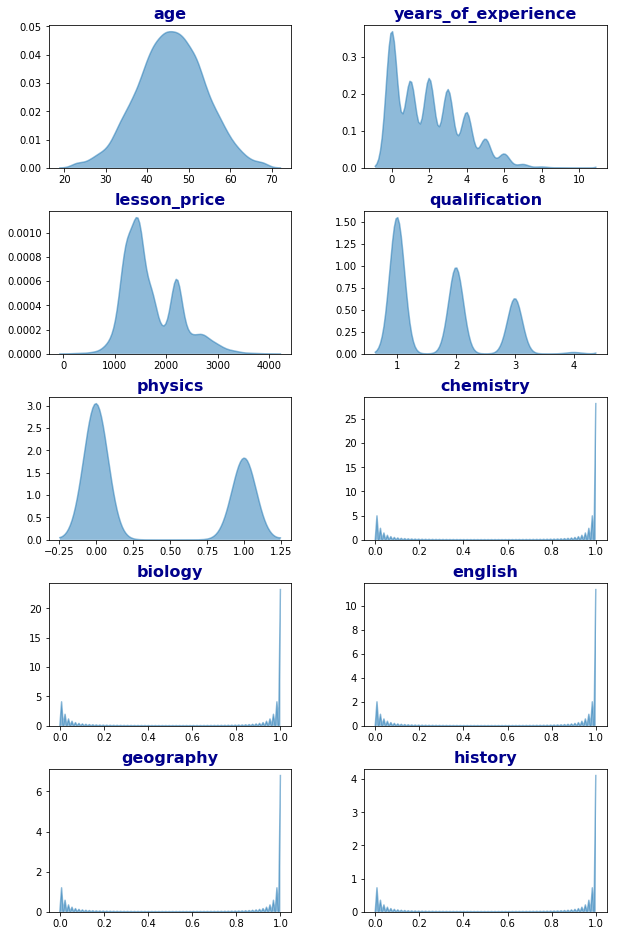

In [265]:
# Посмотрим, как ведут себя признаки

plt.figure(figsize=(10, 30))

for i, colname in enumerate(FEATS):
    plt.subplot(9,2,i+1)
    plt.title(colname, fontdict=title_dict)
    sns.kdeplot(df_train[colname], shade=True, alpha=0.5, legend=False)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

#### Признаки имеют различную природу:
#### Возраст имеет нормальное распределение со средней в 45 лет. 
#### Опыт и квалификация имеет убывающий тренд. Т.е. чем больше опыт, тем меньше преподавателей.
#### Цена за урок имеет 2 выраженные моды: 1,5 тыс и 2,1 тыс. рублей
#### Предметы имеют схожие графики с модой == 1. 
#### История и география имеют меньший вес. Уберем их из расчетов

In [278]:
X = np.array(df_train.drop(columns=[TARGET,'Id','history','geography']))[:500]
y = np.array(df_train[TARGET])[:500]
print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


In [279]:
test = np.array(df_test.drop(columns=['Id','history','geography']))
test.shape

(10000, 8)

#### Разбиваем датасет на тестовый и тренировочный

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

### Реализация случайного леса

In [281]:

def get_bootstrap(data, labels, N):
    random.seed(42)
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [282]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample/2))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [283]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [284]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction

In [285]:
def dispers(labels):
    objects = []
        
    for label in labels:
        objects.append(label)
        
    objects = np.array(objects)    
    pred = objects.mean()
    return np.mean((labels - pred) ** 2)

In [286]:
def quality(left_labels, right_labels, current_dispers):

    # доля выбоки, ушедшей в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispers - p * dispers(left_labels) - (1 - p) * dispers(right_labels)

In [287]:
def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [288]:
def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 4

    current_dispers = dispers(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее min_leaf объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_dispers)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [289]:
def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    
    return Node(index, t, true_branch, false_branch)

In [290]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
    
    forest_a = np.array(forest)
    return forest_a

In [291]:
def regression(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return regression(obj, node.true_branch)
    else:
        return regression(obj, node.false_branch)

In [292]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    predictions = []
    for obj in data:
        prediction = regression(obj, tree)
        predictions.append(prediction)
    return predictions

In [293]:
def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        obj = np.array(obj)
        voted_predictions.append(np.mean(obj))
        
    return voted_predictions

In [294]:
def r_2(labels, answers):
    return (1 - np.sum((answers - labels) ** 2) / np.sum((labels - np.mean(labels))**2))

#### Тренировка и тестирование данных

In [295]:
n_trees = 100

In [296]:
#%%time

mf = random_forest(X_train, y_train, n_trees)


In [297]:
train_answers = tree_vote(mf, X_train)

In [298]:
test_answers = tree_vote(mf, X_test)

In [299]:
train_r_2 = r_2(y_train, train_answers)
print(train_r_2)

0.7949409972856237


In [300]:
test_r_2 = r_2(y_test, test_answers)
print(test_r_2)

0.7605437545434028


In [304]:
#mf1= pd.DataFrame(mf)
#mf1.to_csv('my_forest.csv', index=False)

#### Строим предсказание

In [305]:
df_test[TARGET] = tree_vote(mf, test)

In [306]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,54.51
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,63.88
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,51.11
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,89.27
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,88.31


#### Выгружаем данные

In [307]:
df_test.loc[:, ['Id', TARGET]].to_csv('SKozina_prediction.csv', index=False, encoding='utf-8')